# **Proyecto de Predicción de Ventas: Rossmann Store Sales**

## **Descripción del Proyecto**
Este proyecto se enfoca en predecir las ventas diarias de las tiendas de la cadena Rossmann, utilizando datos históricos, características específicas de cada tienda y factores externos. La solución está orientada a optimizar la gestión de inventarios, la planificación de recursos y la toma de decisiones estratégicas.

## **Objetivos del Proyecto**
- Construir un modelo de aprendizaje automático que permita predecir las ventas futuras de manera precisa.
- Identificar las variables más influyentes en las ventas diarias.
- Generar un informe visual e interactivo que facilite la interpretación de los resultados y sirva como herramienta para la toma de decisiones.

## **Estructura del Proyecto**
1. **Carga y Exploración Inicial de Datos**: Inspección de los datos disponibles y detección de posibles inconsistencias.
2. **Análisis Exploratorio de Datos (EDA)**: Comprensión de patrones y relaciones entre las variables.
3. **Preprocesamiento de los Datos**: Manejo de valores nulos, codificación de variables categóricas y transformación de datos.
4. **Construcción de Modelos Predictivos**: Entrenamiento de modelos de aprendizaje automático.
5. **Evaluación del Modelo**: Medición de la precisión y optimización del modelo.
6. **Visualización de Resultados**: Creación de gráficos y dashboards interactivos.
7. **Conclusiones y Recomendaciones**: Síntesis de los hallazgos y recomendaciones estratégicas.

## **Archivos Utilizados**
- `train.csv`: Datos históricos de ventas utilizados para entrenar el modelo.
- `test.csv`: Datos para evaluar el modelo y realizar predicciones.
- `store.csv`: Información adicional sobre las características de las tiendas.
- `sample_submission.csv`: Plantilla para el formato de las predicciones finales.

## **Herramientas Utilizadas**
- **Lenguaje de Programación**: Python
- **Bibliotecas**: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, XGBoost
- **Entorno de Desarrollo**: Jupyter Notebook
- **Dataset**: Proporcionado por Kaggle

---

# Carga y Exploración Inicial de los Datos

Este paso consiste en cargar y realizar una inspección básica de los datasets que se utilizarán en el proyecto. Los archivos involucrados son:

1. `train.csv`: Contiene los datos históricos de ventas utilizados para entrenar el modelo.
2. `test.csv`: Incluye los datos para realizar predicciones.
3. `store.csv`: Contiene información sobre las características de las tiendas.
4. `sample_submission.csv`: Un archivo de ejemplo con el formato esperado para las predicciones.

---

## 1. Carga de Datos
- Los archivos son cargados en dataframes utilizando **pandas**.
- Esto asegura que los datos estén listos para ser procesados y analizados.

---

## 2. Información General de los Datasets
- Se imprime la estructura y resumen de cada dataset utilizando el método `.info()`.
- Esto permite identificar:
  - Número de filas y columnas.
  - Tipos de datos.
  - Valores nulos presentes en cada columna.

---

## 3. Exploración de las Primeras Filas
- Para entender mejor el contenido, se muestran las primeras filas de cada archivo con el método `.head()`.
- Esto ayuda a verificar la correcta carga de los datos y proporciona un vistazo inicial a su estructura.

---

## Resultados Esperados
Tras este análisis inicial, obtendremos:
- Un resumen claro de la estructura de los datasets.
- Una comprensión básica del contenido y formato de los datos.
- Identificación temprana de posibles problemas, como valores nulos o tipos de datos incorrectos, para abordar en etapas posteriores.

In [12]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np

# Cargar los archivos CSV
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
store_data = pd.read_csv('store.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Mostrar información básica de los datos
print("Información del Dataset de Ventas (train):")
print(train_data.info())

print("\nInformación del Dataset de Prueba (test):")
print(test_data.info())

print("\nInformación del Dataset de Tiendas (store):")
print(store_data.info())

print("\nInformación del Archivo de Submisión (sample_submission):")
print(sample_submission.info())

# Opcional: Ver las primeras filas de cada archivo
print("\nPrimeras filas de train.csv:")
print(train_data.head())

print("\nPrimeras filas de test.csv:")
print(test_data.head())

print("\nPrimeras filas de store.csv:")
print(store_data.head())

print("\nPrimeras filas de sample_submission.csv:")
print(sample_submission.head())

Información del Dataset de Ventas (train):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None

Información del Dataset de Prueba (test):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store 

/var/folders/mm/zpzhpk7j4gg5jwqrs0p98z5h0000gn/T/ipykernel_49249/3477392679.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')


# Análisis Exploratorio de Datos (EDA)

Este paso se enfoca en explorar la estructura y relaciones dentro del conjunto de datos `train_data`. El objetivo es identificar patrones, distribuciones y correlaciones relevantes para el modelado posterior.

---

## 1. Distribución de Ventas
- Se inspecciona la distribución de la variable `Sales` utilizando un histograma combinado con una estimación de densidad (KDE).
- Esto permite entender la dispersión de las ventas y detectar posibles valores atípicos.

---

## 2. Mapa de Correlaciones
- Se calcula una matriz de correlaciones entre las variables numéricas del conjunto de datos.
- Un heatmap visualiza estas correlaciones, destacando relaciones fuertes (positivas o negativas) entre variables.
- Esto es útil para identificar qué variables podrían tener mayor impacto en las ventas.

---

## 3. Impacto de Variables Categóricas
- Se analiza el impacto de la variable categórica `Promo` sobre las ventas (`Sales`) utilizando un boxplot.
- Este análisis permite evaluar cómo las promociones (indicado por `Promo` = 1) afectan la distribución de ventas en comparación con períodos sin promociones (`Promo` = 0).

---

## 4. Análisis Temporal
- Se transforman las fechas (`Date`) en nuevas variables temporales: `Year`, `Month` y `Day`.
- Se visualizan las tendencias de ventas a lo largo del tiempo utilizando un gráfico de líneas.
- Esto permite identificar patrones estacionales o tendencias generales que pueden influir en las ventas.

---

## Resultados Esperados
Tras realizar este análisis:
- Se obtendrán insights sobre la distribución de ventas y su relación con otras variables.
- Las visualizaciones ayudarán a identificar patrones y correlaciones clave para el modelado predictivo.
- La transformación de las fechas proporcionará una base sólida para analizar factores temporales en el desempeño de ventas.

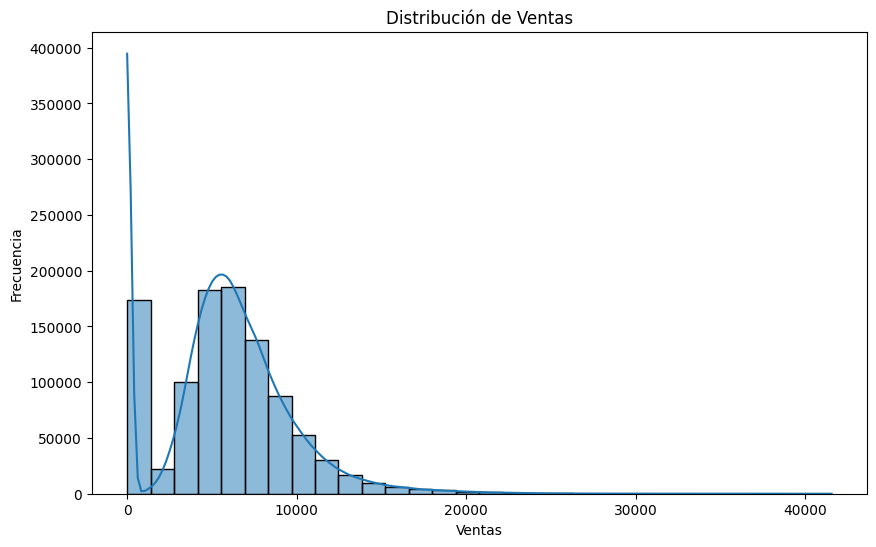

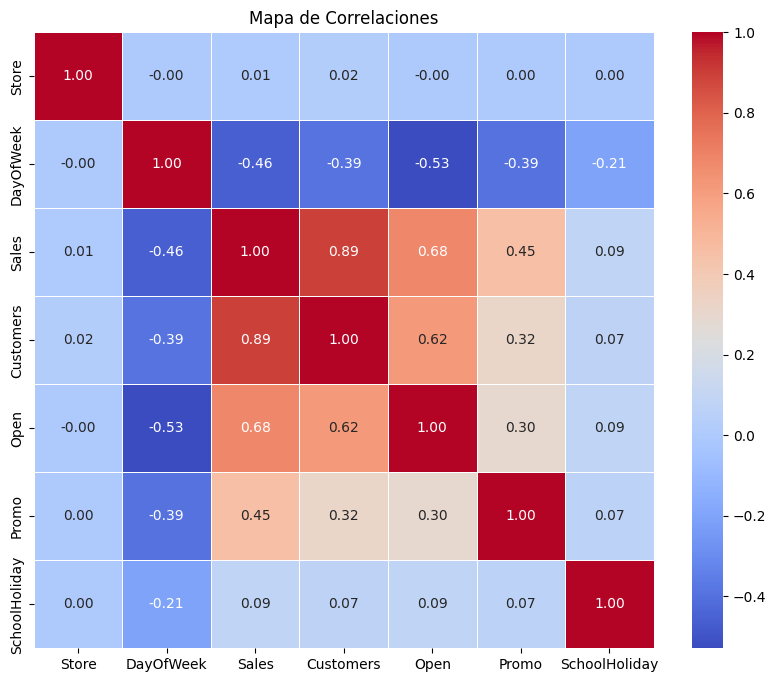

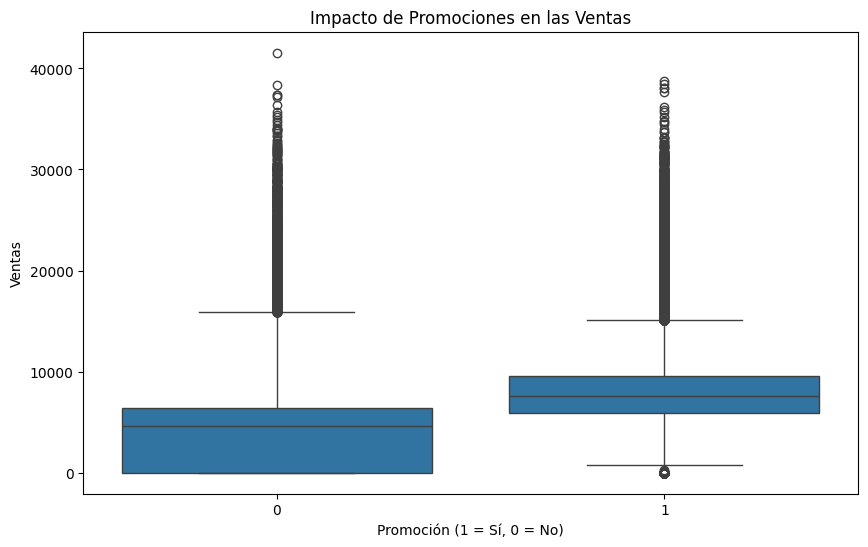

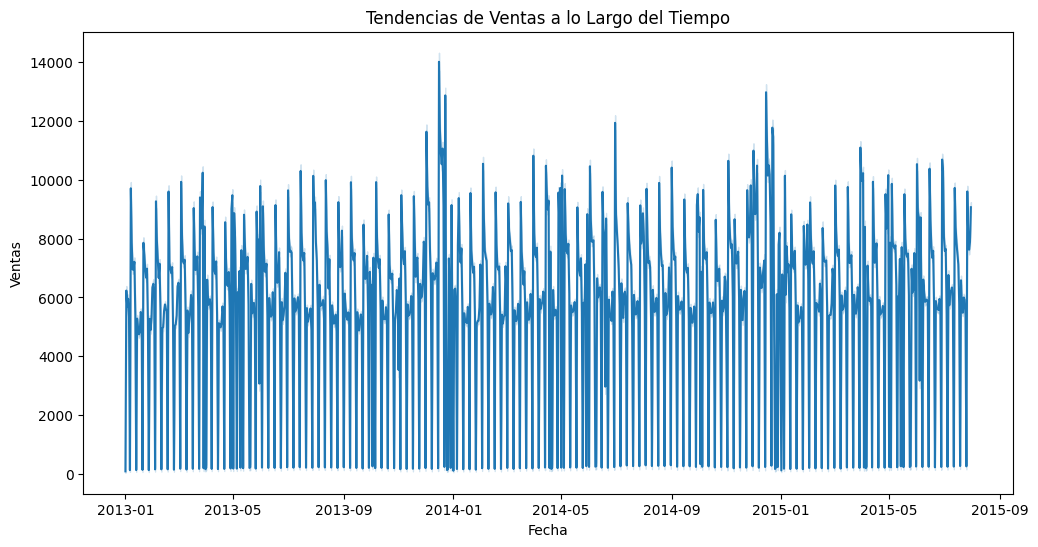

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Inspeccionar la distribución de las ventas
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Sales'], bins=30, kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre variables numéricas (heatmap de correlaciones)
plt.figure(figsize=(10, 8))

# Seleccionar solo las columnas numéricas para el cálculo de la correlación
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_data[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlaciones')
plt.show()

# Impacto de variables categóricas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=train_data)
plt.title('Impacto de Promociones en las Ventas')
plt.xlabel('Promoción (1 = Sí, 0 = No)')
plt.ylabel('Ventas')
plt.show()

# Tendencias temporales
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
train_data['Day'] = train_data['Date'].dt.day

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=train_data)
plt.title('Tendencias de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

## Preprocesamiento de los Datos

### **1. Manejo de Valores Nulos**

### **2. Codificación de Variables Categóricas**

### **3. Escalado de Variables Numéricas**

### **4. División del Dataset**

El preprocesamiento asegura que los datos estén limpios, codificados y normalizados para el análisis posterior.

# Manejo de Valores Nulos

En este paso, abordamos la problemática de valores nulos en el conjunto de datos `train_data`. 

### Verificación de Valores Nulos
- Se identifica la cantidad de valores nulos por columna.
- Se calcula el porcentaje de valores nulos en relación con el total de registros del conjunto de datos.

### Imputación de Valores Nulos
Se implementa una estrategia de imputación basada en el tipo de datos:
1. **Variables categóricas**:
   - Los valores nulos se imputan utilizando la moda (valor más frecuente).
   - Si la columna tiene múltiples modas, se selecciona la primera.
2. **Variables numéricas**:
   - Se compara la media y la mediana de la columna:
     - Si la diferencia es significativa (más del 10% de la media), se utiliza la mediana para evitar la influencia de valores atípicos.
     - En caso contrario, se utiliza la media.

### Consideraciones
- Este enfoque asegura que los valores nulos sean manejados de forma adecuada, preservando las características estadísticas del conjunto de datos.
- Se genera un log detallado en la consola con la decisión tomada para cada columna, facilitando la trazabilidad del proceso.

### Resultado Esperado
Tras la ejecución del código:
- El conjunto de datos estará libre de valores nulos.
- Cada columna será imputada con el método más adecuado según su tipo de datos y distribución.

In [14]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(train_data.isnull().sum())

# Análisis previo de valores nulos
print("\nPorcentaje de valores nulos por columna:")
missing_percentage = (train_data.isnull().sum() / len(train_data)) * 100
print(missing_percentage)

# Imputación inteligente de valores nulos
for column in train_data.columns:
    if train_data[column].isnull().sum() > 0:  # Verificar si hay valores nulos
        print(f"\nImputando valores nulos en la columna '{column}':")
        
        if train_data[column].dtype == 'object':  # Variables categóricas
            # Usar la moda para imputar valores categóricos
            mode_value = train_data[column].mode()
            if len(mode_value) > 1:
                print(f"Columna '{column}' tiene múltiples modas: {mode_value.values}. Seleccionando la primera.")
            train_data[column].fillna(mode_value[0], inplace=True)
            print(f"Valores nulos imputados con la moda: {mode_value[0]}")
        else:  # Variables numéricas
            mean_value = train_data[column].mean()
            median_value = train_data[column].median()
            # Analizar si usar media o mediana basado en la distribución
            print(f"Media: {mean_value}, Mediana: {median_value}")
            if abs(mean_value - median_value) > 0.1 * mean_value:  # Decisión basada en outliers
                train_data[column].fillna(median_value, inplace=True)
                print(f"Valores nulos imputados con la mediana: {median_value}")
            else:
                train_data[column].fillna(mean_value, inplace=True)
                print(f"Valores nulos imputados con la media: {mean_value}")

Valores nulos por columna:
Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
Year             0
Month            0
Day              0
dtype: int64

Porcentaje de valores nulos por columna:
Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
Year             0.0
Month            0.0
Day              0.0
dtype: float64


# Transformación de Variables Categóricas

Este paso se enfoca en identificar y transformar las variables categóricas presentes en el conjunto de datos `train_data`. El objetivo es convertir estas variables en formatos que puedan ser utilizados por los modelos de aprendizaje automático.

---

## 1. Identificación de Variables Categóricas
- Se identifican las columnas categóricas (`object`) en el conjunto de datos.

---

## 2. Verificación de Cardinalidad
- Para cada columna categórica, se calcula la cardinalidad (número de valores únicos).
- Las columnas con alta cardinalidad (más de 20 valores únicos) son tratadas de manera distinta para evitar problemas de memoria y rendimiento.

---

## 3. Manejo de Alta Cardinalidad
- **Alta cardinalidad**:
  - Si una columna tiene demasiados valores únicos, se utiliza **Label Encoding** para convertir sus valores en representaciones numéricas.
  - Esto es más eficiente que One-Hot Encoding para columnas con muchos valores únicos.
- **Baja cardinalidad**:
  - Las columnas con baja cardinalidad se transforman mediante **One-Hot Encoding**. Esto crea nuevas columnas binarias para cada categoría, eliminando la primera categoría para evitar multicolinealidad.

---

## 4. Aplicación de Técnicas de Codificación
1. **One-Hot Encoding**:
   - Se aplica a las columnas categóricas con baja cardinalidad.
   - Esto resulta en la creación de nuevas columnas, una por cada categoría (excepto una).
2. **Label Encoding**:
   - Se aplica a columnas categóricas con alta cardinalidad.
   - Se utilizan los valores únicos como etiquetas numéricas, asignando un número a cada categoría.

---

## 5. Verificación de la Transformación
- Tras aplicar las técnicas de codificación, se verifica la estructura final del conjunto de datos.
- Este paso asegura que todas las variables categóricas han sido transformadas de manera adecuada.

---

## Resultados Esperados
- Las columnas categóricas se convertirán en representaciones numéricas compatibles con los modelos de aprendizaje automático.
- La transformación será eficiente, manejando la cardinalidad alta sin sobrecargar la memoria o afectar el rendimiento del modelo.

In [15]:
# Paso 1: Identificar columnas categóricas
categorical_cols = train_data.select_dtypes(include=['object']).columns
print("\nColumnas categóricas identificadas:")
print(categorical_cols)

# Paso 2: Verificar la cardinalidad de las columnas categóricas
print("\nCardinalidad de las columnas categóricas:")
for col in categorical_cols:
    unique_values = train_data[col].nunique()
    print(f"Columna '{col}': {unique_values} valores únicos")

# Paso 3: Manejo de cardinalidad alta
# Si una columna categórica tiene demasiados valores únicos, puede causar problemas de memoria.
high_cardinality_cols = [col for col in categorical_cols if train_data[col].nunique() > 20]
if high_cardinality_cols:
    print("\nColumnas con alta cardinalidad detectadas (más de 20 valores únicos):")
    print(high_cardinality_cols)
else:
    print("\nNo se detectaron columnas con alta cardinalidad.")

# Paso 4: Aplicar One-Hot Encoding a columnas categóricas con cardinalidad baja
print("\nAplicando One-Hot Encoding a columnas categóricas...")
low_cardinality_cols = [col for col in categorical_cols if col not in high_cardinality_cols]
train_data = pd.get_dummies(train_data, columns=low_cardinality_cols, drop_first=True)

# Paso 5: Codificar columnas categóricas con alta cardinalidad (si existen)
# En lugar de One-Hot Encoding, usar Label Encoding o Target Encoding para alta cardinalidad.
from sklearn.preprocessing import LabelEncoder

if high_cardinality_cols:
    print("\nAplicando Label Encoding a columnas con alta cardinalidad...")
    label_encoders = {}  # Almacenar los encoders para referencia futura
    for col in high_cardinality_cols:
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col])
        label_encoders[col] = le  # Guardar el encoder para referencia

# Paso 6: Verificar la transformación final
print("\nDatos después de codificar las variables categóricas:")
print(train_data.head())


Columnas categóricas identificadas:
Index(['StateHoliday'], dtype='object')

Cardinalidad de las columnas categóricas:
Columna 'StateHoliday': 5 valores únicos

No se detectaron columnas con alta cardinalidad.

Aplicando One-Hot Encoding a columnas categóricas...

Datos después de codificar las variables categóricas:
   Store  DayOfWeek       Date  Sales  Customers  Open  Promo  SchoolHoliday  \
0      1          5 2015-07-31   5263        555     1      1              1   
1      2          5 2015-07-31   6064        625     1      1              1   
2      3          5 2015-07-31   8314        821     1      1              1   
3      4          5 2015-07-31  13995       1498     1      1              1   
4      5          5 2015-07-31   4822        559     1      1              1   

   Year  Month  Day  StateHoliday_0  StateHoliday_a  StateHoliday_b  \
0  2015      7   31            True           False           False   
1  2015      7   31            True           False      

# Escalado de Datos Numéricos

En este paso, transformamos las columnas numéricas del conjunto de datos `train_data` para normalizar su rango o estandarizar su distribución. Esto es esencial para optimizar el desempeño de los modelos de aprendizaje automático.

---

## 1. Identificación de Columnas Numéricas
- Se identifican las columnas que contienen datos numéricos (`float64` y `int64`) en el dataset.
- Estas columnas serán las candidatas para el escalado.

---

## 2. Análisis de Distribución
- Se analiza la distribución de cada columna numérica utilizando estadísticas descriptivas (`.describe()`).
- Esto permite determinar las características de cada columna, como su rango y presencia de valores extremos.

---

## 3. Selección del Método de Escalado
- El método de escalado se elige en función de la distribución de los datos:
  - **MinMaxScaler**:
    - Adecuado para datos sin valores extremos significativos.
    - Escala los datos a un rango definido, generalmente [0, 1].
  - **StandardScaler**:
    - Ideal para datos con distribución normal o presencia de valores extremos.
    - Estándariza los datos restando la media y dividiendo por la desviación estándar.
- Los valores extremos se detectan utilizando el rango intercuartílico (IQR).

---

## 4. Aplicación del Escalado
- Cada columna numérica se transforma utilizando el método seleccionado:
  - **MinMaxScaler** para columnas sin valores extremos.
  - **StandardScaler** para columnas con valores extremos.

---

## 5. Verificación de la Transformación
- Se inspeccionan las primeras filas de las columnas numéricas escaladas para confirmar que la transformación se realizó correctamente.

---

## 6. Guardado de Scalers (Opcional)
- Los scalers utilizados en el escalado se guardan como archivos `.pkl` utilizando `joblib`.
- Esto asegura que el mismo escalado pueda aplicarse a nuevos datos (por ejemplo, datos de prueba o futuros).

---

## Resultados Esperados
- Las columnas numéricas estarán normalizadas o estandarizadas, dependiendo de su distribución.
- Los scalers utilizados estarán disponibles para su reutilización, garantizando consistencia en el procesamiento de nuevos datos.

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Paso 1: Identificar columnas numéricas
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
print("\nColumnas numéricas identificadas para escalado:")
print(numeric_cols)

# Paso 2: Analizar la distribución de las columnas numéricas
print("\nAnálisis de distribución de columnas numéricas:")
for col in numeric_cols:
    print(f"Columna '{col}':")
    print(train_data[col].describe())

# Paso 3: Seleccionar el método de escalado basado en la distribución
# - MinMaxScaler: Para datos con un rango definido o sin valores extremos significativos.
# - StandardScaler: Para datos con una distribución normal o que incluyen valores extremos.
scalers = {}
for col in numeric_cols:
    # Detectar valores extremos usando el rango intercuartílico (IQR)
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((train_data[col] < lower_bound) | (train_data[col] > upper_bound)).sum()
    print(f"Valores extremos detectados en '{col}': {outliers}")

    # Escoger el método de escalado
    if outliers > 0:
        print(f"Usando StandardScaler para '{col}' debido a la presencia de valores extremos.")
        scaler = StandardScaler()
    else:
        print(f"Usando MinMaxScaler para '{col}'.")
        scaler = MinMaxScaler()

    # Aplicar el escalado y almacenar el scaler
    train_data[[col]] = scaler.fit_transform(train_data[[col]])
    scalers[col] = scaler

# Paso 4: Verificar la transformación
print("\nDatos después de aplicar el escalado:")
print(train_data[numeric_cols].head())

# Paso 5: Guardar los scalers (opcional)
# Esto es útil si necesitas aplicar el mismo escalado a nuevos datos en el futuro.
import joblib

print("\nGuardando scalers utilizados...")
for col, scaler in scalers.items():
    joblib.dump(scaler, f"{col}_scaler.pkl")
print("Scalers guardados exitosamente.")


Columnas numéricas identificadas para escalado:
Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday'],
      dtype='object')

Análisis de distribución de columnas numéricas:
Columna 'Store':
count    1.017209e+06
mean     5.584297e+02
std      3.219087e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.580000e+02
75%      8.380000e+02
max      1.115000e+03
Name: Store, dtype: float64
Columna 'DayOfWeek':
count    1.017209e+06
mean     3.998341e+00
std      1.997391e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      7.000000e+00
Name: DayOfWeek, dtype: float64
Columna 'Sales':
count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64
Columna 'Customers':
count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%    

# División del Dataset en Conjuntos de Entrenamiento y Prueba

Este paso separa el dataset en características (X) y variable objetivo (y), y posteriormente divide los datos en conjuntos de entrenamiento y prueba. Esto asegura que el modelo sea evaluado adecuadamente en datos no vistos.

---

## 1. Separación de Características y Variable Objetivo
- **Características (`X`)**: Todas las columnas excepto la variable objetivo.
- **Variable objetivo (`y`)**: La columna que queremos predecir, definida como `Sales` en este caso.

Se valida la presencia de la variable objetivo en el dataset antes de proceder.

---

## 2. Análisis de la Variable Objetivo
- Se verifica si la variable objetivo tiene menos de 20 valores únicos para identificar posibles problemas de desequilibrio.
- Si se detecta un desequilibrio significativo, se recomienda usar **estratificación** al dividir los datos.

---

## 3. División en Conjuntos de Entrenamiento y Prueba
- Se utiliza una proporción de 80%-20% para dividir los datos:
  - **80%** para el conjunto de entrenamiento.
  - **20%** para el conjunto de prueba.
- La estratificación se puede habilitar para garantizar que la distribución de la variable objetivo sea representativa en ambos conjuntos.

---

## 4. Validación de los Conjuntos
- Se imprimen las dimensiones de los conjuntos resultantes:
  - `X_train` y `y_train` para el entrenamiento.
  - `X_test` y `y_test` para la evaluación.
- También se verifica que las proporciones de datos sean correctas.

---

## 5. Guardado de los Conjuntos Divididos (Opcional)
- Los conjuntos de entrenamiento y prueba se guardan como archivos `.pkl` utilizando **joblib**.
- Esto permite reutilizar los conjuntos en etapas posteriores del proyecto, asegurando reproducibilidad.

---

## Resultados Esperados
- Los datos estarán correctamente divididos en conjuntos de entrenamiento y prueba.
- La proporción de los conjuntos será 80%-20%, salvo que se especifique un ajuste diferente.
- Los archivos resultantes se guardarán en el directorio de trabajo, listos para ser utilizados en el modelado.

In [17]:
from sklearn.model_selection import train_test_split

# Paso 1: Separar características (X) y variable objetivo (y)
target_column = 'Sales'  # Definir la variable objetivo
if target_column not in train_data.columns:
    raise ValueError(f"La columna objetivo '{target_column}' no se encuentra en el dataset.")

print("\nSeparando características (X) y variable objetivo (y)...")
X = train_data.drop(target_column, axis=1)
y = train_data[target_column]

# Validar dimensiones de X e y
print(f"Dimensión de X (características): {X.shape}")
print(f"Dimensión de y (objetivo): {y.shape}")

# Paso 2: Validar si hay desequilibrio en la variable objetivo
if y.nunique() < 20:  # Supongamos que menos de 20 valores únicos podría ser una variable categórica o ordinal
    print("\nAnálisis de distribución de la variable objetivo:")
    print(y.value_counts(normalize=True))
    print("\nSe recomienda usar estratificación si se observa un desequilibrio significativo.")

# Paso 3: Dividir en conjuntos de entrenamiento y prueba
print("\nDividiendo el dataset en conjuntos de entrenamiento y prueba (80% - 20%)...")
try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=0.2, 
        random_state=42, 
        stratify=None  # Cambiar a y si la variable objetivo está desequilibrada
    )
except ValueError as e:
    raise ValueError(f"Error al dividir el dataset: {e}")

# Paso 4: Validar tamaños de los conjuntos
print("\nValidando tamaños de los conjuntos...")
print(f"Tamaño del conjunto de entrenamiento: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Tamaño del conjunto de prueba: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Paso 5: Verificar proporción de datos en los conjuntos
print("\nVerificando proporción de datos en los conjuntos:")
train_ratio = len(X_train) / (len(X_train) + len(X_test))
test_ratio = len(X_test) / (len(X_train) + len(X_test))
print(f"Proporción en conjunto de entrenamiento: {train_ratio:.2%}")
print(f"Proporción en conjunto de prueba: {test_ratio:.2%}")

# Paso 6: Guardar los conjuntos divididos (opcional, para uso posterior o reproducibilidad)
import joblib

print("\nGuardando conjuntos divididos en archivos...")
joblib.dump(X_train, "X_train.pkl")
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_train, "y_train.pkl")
joblib.dump(y_test, "y_test.pkl")
print("Conjuntos guardados exitosamente.")


Separando características (X) y variable objetivo (y)...
Dimensión de X (características): (1017209, 14)
Dimensión de y (objetivo): (1017209,)

Dividiendo el dataset en conjuntos de entrenamiento y prueba (80% - 20%)...

Validando tamaños de los conjuntos...
Tamaño del conjunto de entrenamiento: X_train: (813767, 14), y_train: (813767,)
Tamaño del conjunto de prueba: X_test: (203442, 14), y_test: (203442,)

Verificando proporción de datos en los conjuntos:
Proporción en conjunto de entrenamiento: 80.00%
Proporción en conjunto de prueba: 20.00%

Guardando conjuntos divididos en archivos...
Conjuntos guardados exitosamente.
